In [5]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from matplotlib import pyplot as plt

import pytesseract
import numpy as np
from pytesseract import Output
import cv2
img = cv2.imread('bw.png')
# Rescale the image, if needed.
#img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
#img = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
    # Convert to gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply dilation and erosion to remove some noise
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)

# Apply blur to smooth out the edges
img = cv2.bilateralFilter(img,9,75,75)  

    # Thresholding types
#img=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#img=cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img= cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

26 63 77 25 Testing
109 63 101 19 Tesseract
216 63 59 19 OCR


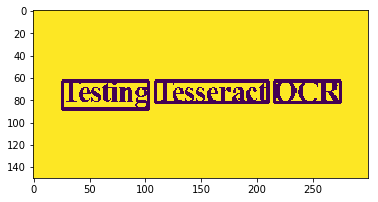

In [6]:
d = pytesseract.image_to_data(img,lang='Greek+eng',config='--psm 12',output_type=Output.DICT)
n_boxes = len(d['level'])

temp_coord = []
temp_text = []

for i in range(n_boxes):
    if d['text'][i]!= "" :
    
        (x, y, w, h,t) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i],d['text'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0),2)
        temp_coord.append((x,y,w,h))
        temp_text.append(t)
        print (x, y, w, h,t)
        
ocr_dict = dict(zip(tuple(temp_coord),temp_text))

#Show the image with matplotlib

plt.imshow(img)
plt.show()